In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

In [ ]:
! pip install umap-learn[plot]
import umap.plot

In [ ]:
!unzip All_vect.zip

In [ ]:
y = np.array(pd.read_csv('digit.csv'))[:,1:]
digit = y.reshape((70000,))
height = np.array(pd.read_csv('All_vect/height_2_allvect.csv'))[:,1:]
density = np.array(pd.read_csv('All_vect/density_2_allvect.csv'))[:,1:]
radial = np.array(pd.read_csv('All_vect/radial_2_allvect.csv'))[:,1:]
line = np.array(pd.read_csv('All_vect/line_2_allvect.csv'))[:,1:]
grayscale = np.array(pd.read_csv('All_vect/grayscale_2_allvect.csv'))[:,1:]
vr = np.array(pd.read_csv('All_vect/vr_data_2.csv'))[:,1:]

In [ ]:
data = np.concatenate((height, density, radial, line, grayscale, vr), axis = 1)

In [ ]:
def embeddable_image_1(data):
  output = BytesIO()
  img = Image.fromarray(data.reshape((28,28)))
  img.save(output, format="PNG")
  contents = output.getvalue()
  img_encoded = base64.b64encode(contents)
  return 'data:image/png;base64,' + img_encoded.decode()

In [ ]:
umap_plot = umap.UMAP(random_state = 3142).fit(data[:5000,:])
hover_data = pd.DataFrame({'label':digit[:5000]})

In [ ]:
from bokeh.plotting import figure, output_file, save
output_file('plot.html')
p = umap.plot.interactive(umap_plot, labels = digit[:5000], hover_data=hover_data, point_size=2)
save(p)

'/content/plot.html'

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
#hover_data_1 = pd.DataFrame({'label':digit[:5000]})
tooltip_s = []
for i in range(0,5000):
  tooltip_s.append(embeddable_image_1(x_train[i]))
  output.close()

In [ ]:
reducer = umap.UMAP(random_state=3142)
embedding = reducer.fit_transform(data)

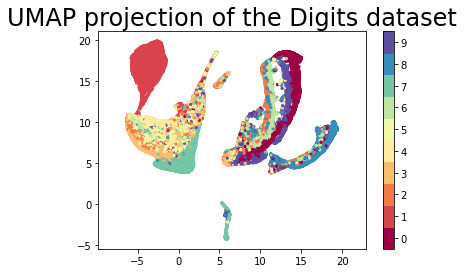

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset');

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
digits_df = pd.DataFrame(embedding[:5000,:], columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digit[:5000]]
digits_df['image'] = tooltip_s

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in [0,1,2,3,4,5,6,7,8,9]],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)